# Trabajo practico computacional

## Fuerza de vínculo




$$F_v = 3mg\cos{\theta}+2kR\sin^2{\theta}-kR$$

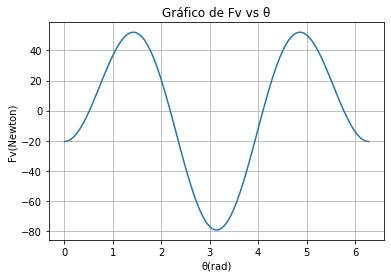

In [24]:
import numpy as np

pi = np.pi
g = 9.81
m = 1
k = 50
R = 1
b = k*R

θ = np.linspace(0,2*pi,100)
y = 3*m*g*np.cos(θ)+2*b*np.sin(θ)*np.sin(θ)-b

from matplotlib import pyplot as plt
plt.ion()

plt.plot(θ,y)
plt.xlabel('θ(rad)')
plt.ylabel('Fv(Newton)')
plt.title('Gráfico de Fv vs θ')
plt.grid()

## Puntos de equilibrio

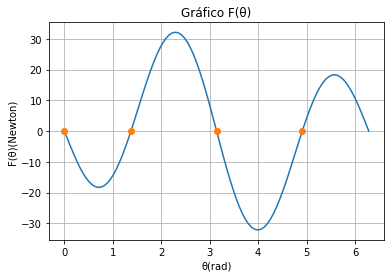

In [25]:
y = np.sin(θ)*(-(k/m)*np.cos(θ)+g/R)

plt.plot(θ,y)
plt.xlabel('θ(rad)')
plt.ylabel('F(θ)(Newton)')
plt.title('Gráfico F(θ)')
plt.grid()
plt.plot([np.arccos(m*g/(k*R)),2*pi -np.arccos(m*g/(k*R)), pi, 0], [0,0,0,0] , 'o' , label='datos')

## Solución numérica

In [26]:
# Parámetros para la resolución numérica
dt = 0.01 # paso temporal
t_i = 0 # tiempo inicial
t_f = 8 # tiempo final

length = 100
t_array = np.linspace(t_i, t_f, length) # [0, 8/100, 2*8/100,...,100*8/100 = 8]

In [27]:
from scipy.integrate import odeint

theta_0 = 0
thetap_0 = 0.1

X0 = [theta_0, thetap_0]

def dθpdt(t, theta, thetap): # esto es la derivada segunda de x respecto de t
      return (g/R) * np.sin(theta) - (k/m) * np.sin(theta) * np.cos(theta)

def dθdt(t, theta, thetap):
      return thetap

def ecdif(X, t):
    theta, thetap = X
    return [dθdt(t, theta, thetap), dθpdt(t, theta, thetap)]

[9, 16]

In [28]:
solucion = odeint(ecdif, X0, t_array) # en vez de pasarle un dt le pasamos el array de tiempos en el que queremos la sol.
theta_odeint = solucion[:,0]

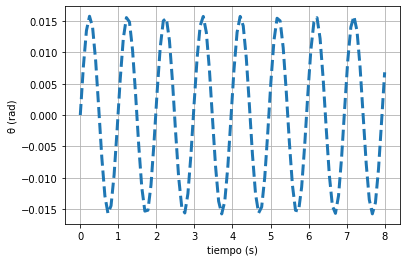

In [29]:
plt.plot(t_array, theta_odeint, '--', label='Odeint', lw=3)
plt.xlabel('tiempo (s)')
plt.ylabel('θ (rad)')
plt.grid()